In [264]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [265]:
url = 'https://raw.githubusercontent.com/Abhinavashish441/Machine-Learning-Projects/main/data/Crop_recommendation.csv'
df=pd.read_csv(url)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [266]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploratory Data Analysis

### Heatmap to check null/missing values

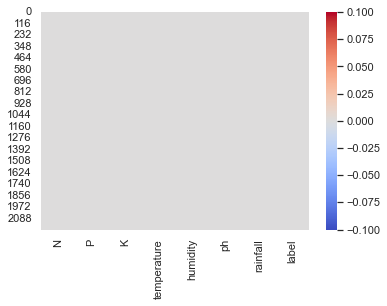

In [267]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<h4> <u>Let's have a closer look at the distribution of temperature and ph.</u><br><br>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<AxesSubplot:xlabel='ph', ylabel='Density'>

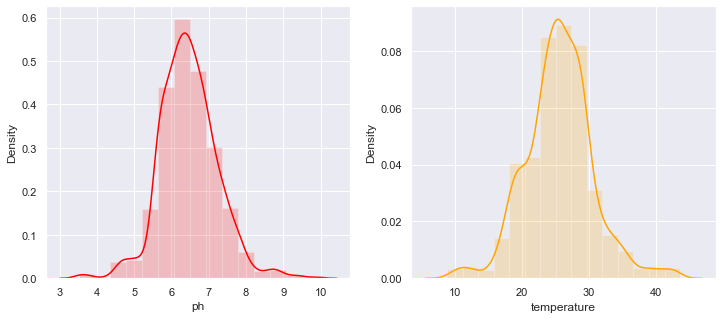

In [335]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
sns.distplot(df['temperature'],color="orange",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 1)
sns.distplot(df['ph'],color="red",bins=15,hist_kws={'alpha':0.2})

<h4> A quick check if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity but so far everything looks good! <h4>

<AxesSubplot:xlabel='count', ylabel='label'>

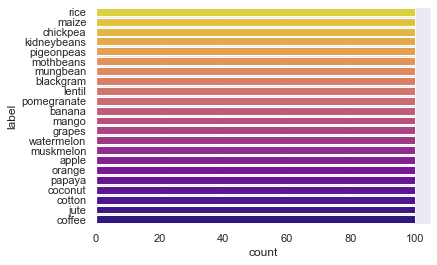

In [327]:
sns.countplot(y='label',data=df, palette="plasma_r")

<h4> A very important plot to visualize the diagonal distribution between two features for all the combinations! It is great to visualize how classes differ from each other in a particular space.

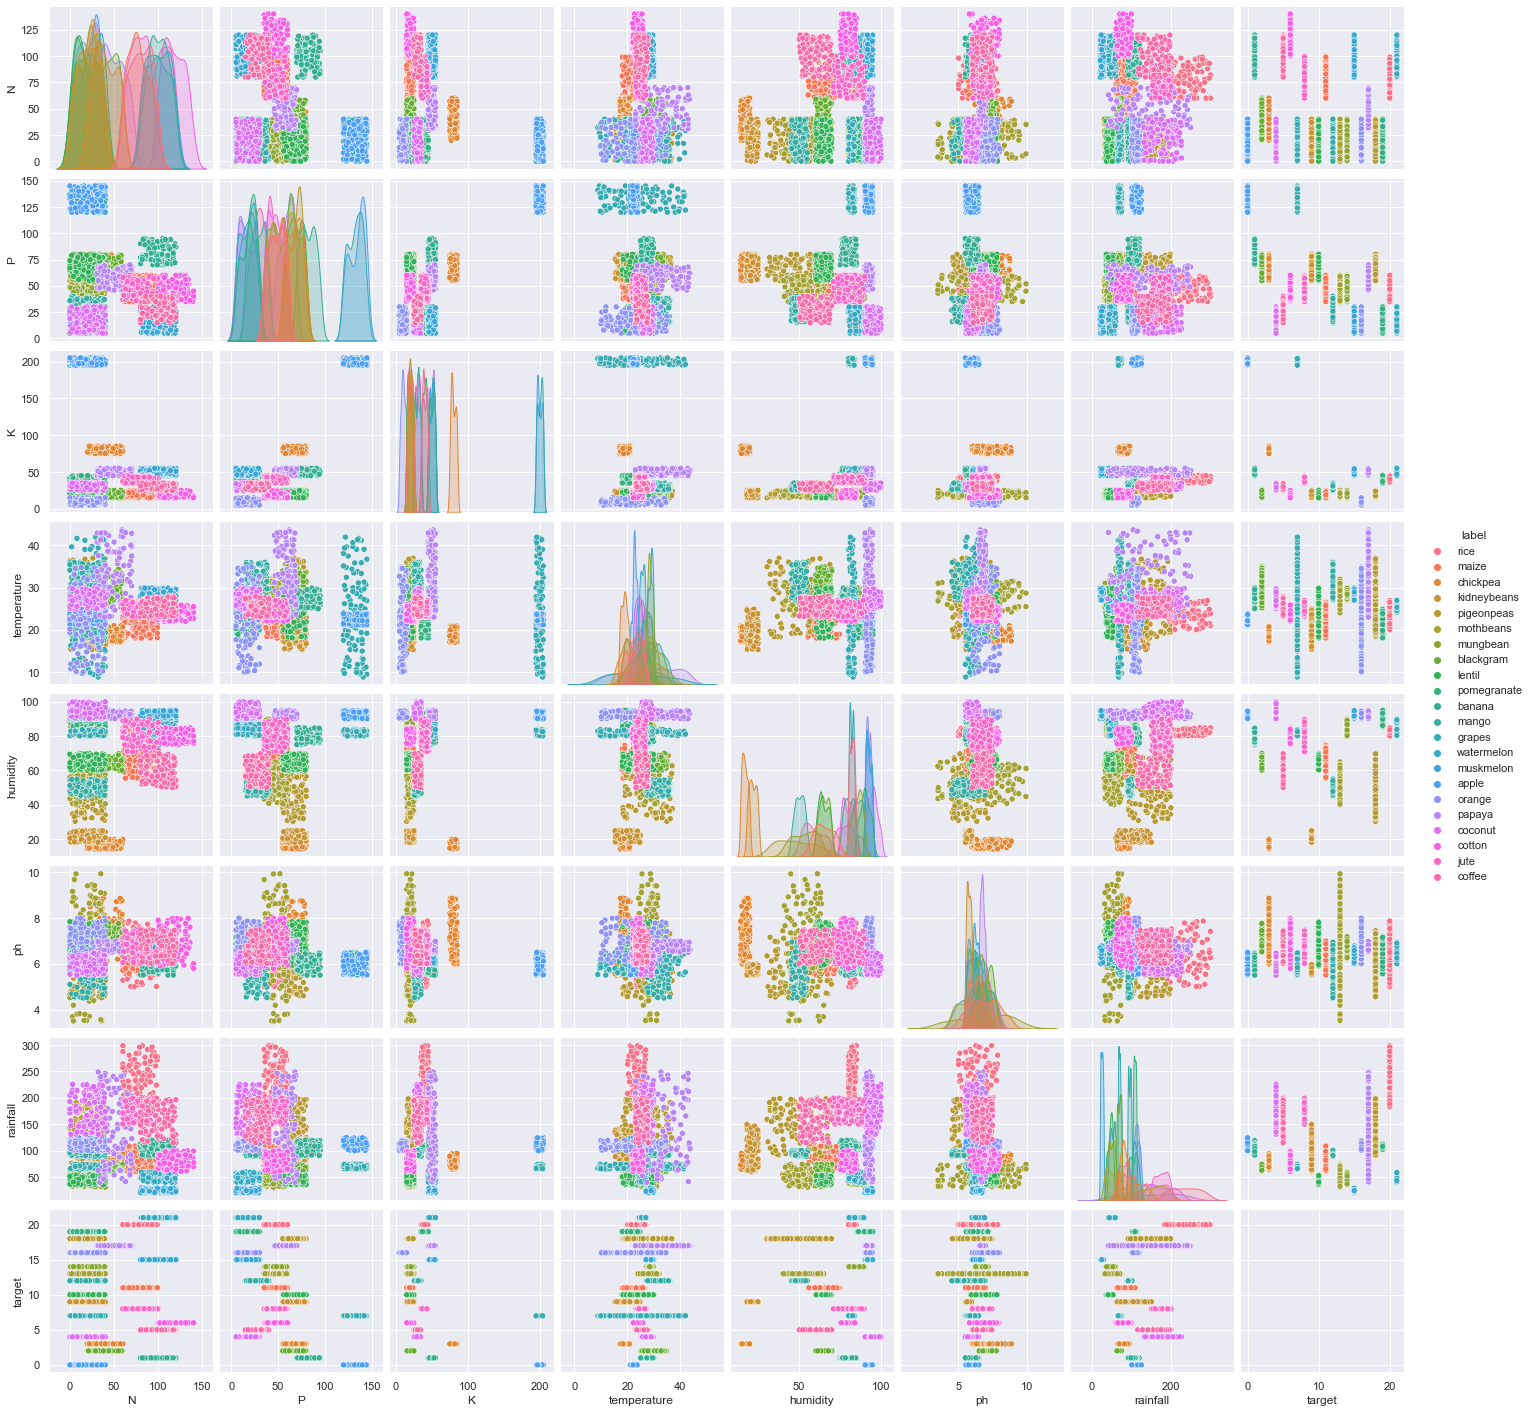

In [330]:
sns.pairplot(df, hue = 'label')

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season. 

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

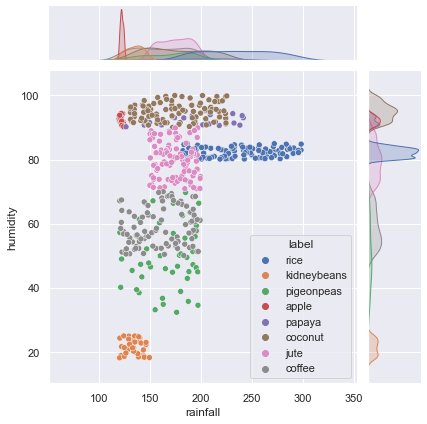

In [271]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

#### This graph correlates with average potassium (K) and average nitrogen (N) value (both>50). 
#### These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.

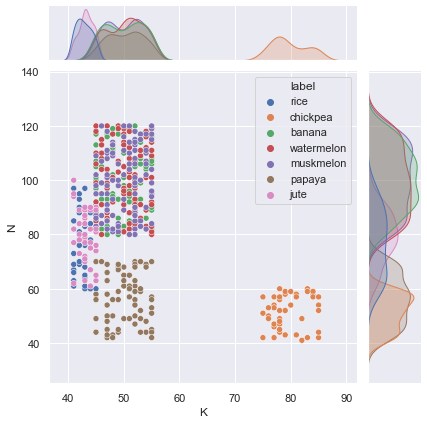

In [272]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

<h4>Let's try to plot a specfic case of pairplot between `humidity` and `K` (potassium levels in the soil.)</h4>

#### `sns.jointplot()` can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

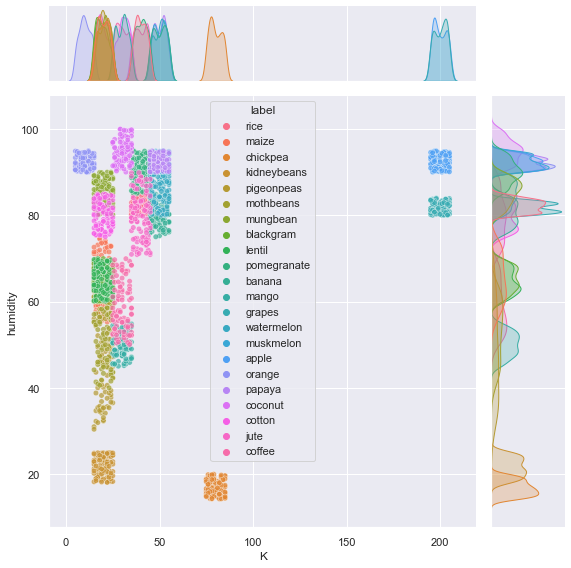

In [273]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<AxesSubplot:xlabel='ph', ylabel='label'>

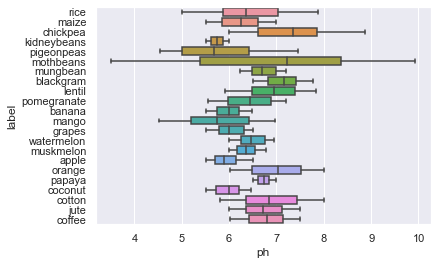

In [274]:
sns.boxplot(y='label',x='ph',data=df)

#### Another interesting analysis where Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

<AxesSubplot:xlabel='P', ylabel='label'>

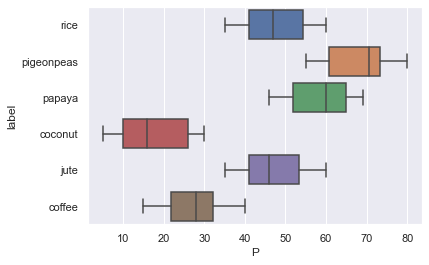

In [275]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

#### Further analyzing phosphorous levels.

When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

<AxesSubplot:xlabel='K', ylabel='rainfall'>

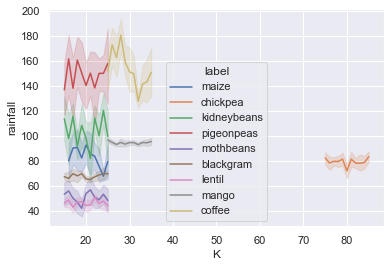

In [276]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

# DATA PRE-PROCESSING

### Let's make the data ready for machine learning model

In [277]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.label
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

<AxesSubplot:>

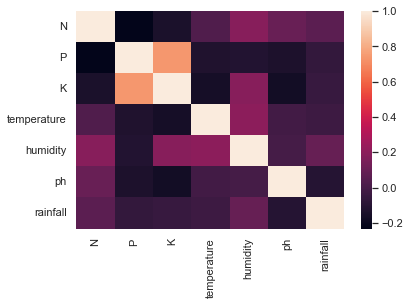

In [278]:
sns.heatmap(X.corr())

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# MODEL SELECTION

## KNN Classifier for Crop prediction. 
<hr>

In [280]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

### Confusion Matrix

<AxesSubplot:>

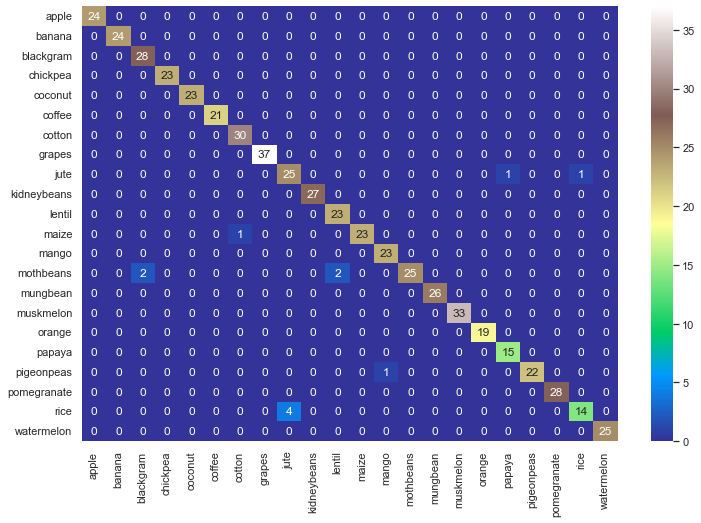

In [281]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

### Let's try different values of n_neighbors to fine tune and get better results

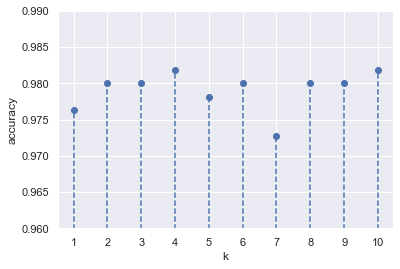

In [282]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

## Classification using Support Vector Classifer (SVC)
<hr>

In [283]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091


### Let's try to increase SVC Linear model accuracy by parameter tuning.

**GridSearchCV can help us find the best parameters.**

In [284]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [285]:
print(model.best_score_ )
print(model.best_params_ )

0.9866710547967747
{'C': 1.0, 'gamma': 0.001}


**POINTS TO BE HIGHLIGHTED**
1. *Interestingly liner kernel also gives satisfactory results but fine tuning increases the computation and might be inefficient in some cases*
2. *The accuracy can be increased in poly kernel by tweaking parameters but might lead to intensive overfitting.*
3. *RBF has better result than linear kernel.*
4. *Poly kernel so far wins by a small margin.*

## Classifying using decision tree
<hr>

In [286]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

### Let's visualize the import features which are taken into consideration by decision trees.

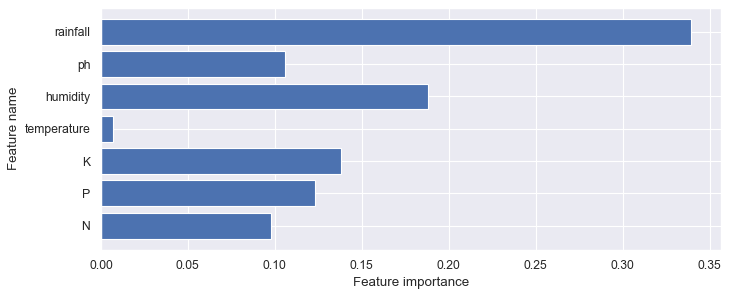

In [287]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

## Classification using Random Forest.
<hr>

In [288]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


In [289]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=0.1).fit(X_train,y_train)


In [290]:
mod.predict(X_test)

array(['grapes', 'muskmelon', 'kidneybeans', 'muskmelon', 'jute',
       'watermelon', 'kidneybeans', 'orange', 'jute', 'pigeonpeas',
       'pomegranate', 'jute', 'coffee', 'mango', 'mothbeans', 'banana',
       'banana', 'coconut', 'banana', 'orange', 'lentil', 'apple',
       'pomegranate', 'papaya', 'muskmelon', 'banana', 'grapes',
       'coconut', 'cotton', 'watermelon', 'maize', 'maize', 'muskmelon',
       'apple', 'mothbeans', 'cotton', 'mango', 'blackgram', 'lentil',
       'orange', 'pigeonpeas', 'grapes', 'orange', 'papaya', 'coconut',
       'pomegranate', 'papaya', 'coffee', 'chickpea', 'jute', 'chickpea',
       'maize', 'lentil', 'pomegranate', 'coffee', 'mungbean',
       'watermelon', 'watermelon', 'cotton', 'mango', 'blackgram',
       'mungbean', 'pomegranate', 'banana', 'coffee', 'muskmelon',
       'chickpea', 'grapes', 'apple', 'jute', 'grapes', 'mango', 'orange',
       'maize', 'rice', 'watermelon', 'watermelon', 'maize', 'cotton',
       'mango', 'chickpea', '

In [291]:

k=mod.predict_proba(X_test)
k

array([[4.59162778e-04, 2.12081690e-32, 6.01090366e-65, ...,
        1.87266104e-34, 2.32249654e-75, 4.27653063e-62],
       [1.68575887e-33, 9.92597388e-16, 7.94204735e-31, ...,
        2.70868326e-18, 5.94029357e-29, 9.20519286e-05],
       [2.35099563e-21, 8.56498551e-08, 2.18038044e-07, ...,
        4.36612758e-20, 4.24808643e-09, 2.28401864e-25],
       ...,
       [1.28573017e-15, 3.14178706e-13, 1.90832912e-03, ...,
        1.22983482e-13, 7.24739768e-14, 5.93099407e-28],
       [1.11044437e-05, 2.52314207e-35, 8.34855945e-67, ...,
        7.16374012e-37, 6.49045181e-80, 2.15023935e-64],
       [5.41080287e-11, 1.81400423e-12, 1.61038739e-02, ...,
        5.39828861e-08, 4.10787210e-18, 3.85478635e-18]])

In [292]:
import  tensorflow as tf
from tensorflow import keras

model=tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[7]),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1000, activation=tf.nn.tanh),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(22,activation=tf.nn.softmax)
                          ])

In [293]:
X_train=X_train.astype('float')
y_train=pd.get_dummies(y_train)
y_train1=y_train.iloc[:,1:6]
y_train1.shape


(1650, 5)

In [294]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_T=std.fit_transform(X_train)
Y_T=std.fit_transform(k)
Xr=X_train.values
yr=y_train.values
Xr.shape

(1650, 7)

In [295]:
yr.shape

(1650, 22)

In [296]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [297]:
hist=model.fit(Xr,yr,epochs=1,verbose=0)

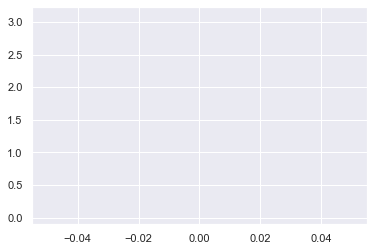

In [298]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])


In [299]:
from keras.wrappers.scikit_learn import KerasClassifier

In [300]:
estimator = KerasClassifier(build_fn = model, epochs = 100, batch_size = 10, verbose = 0)

C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_20100/125333773.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn = model, epochs = 100, batch_size = 10, verbose = 0)


In [301]:
inversed = scaler.inverse_transform(X_test)
l=model.predict_generator(inversed)
r=[]
for i in range(len(l)):
    q=sorted(l[i],reverse=True)[:3]
    r.append(q)
s=np.array(r)
u=[]
for k in range(550):
    for j in range(3):
        u.append(np.where(l[k][:]==s[k][j]))
e=np.array(u)
e=e.reshape((550,3))
e
x=pd.DataFrame(e)
x

,0,1,2
0,17,11,16
1,16,19,4
2,17,11,16
3,16,19,4
4,17,11,16
...,...,...,...
545,17,11,16
546,17,11,16
547,17,11,16
548,17,11,16


In [302]:
q=pd.DataFrame(y_train.columns)
qw=list(y_train.columns)
r=list()
for i in range(550):
    for j in range(3):
        r.append(qw[x[j][i]])
r=np.array(r)
r=r.reshape(550,3)
crope=['Crop 1','Crop 2','Crop 3']
result=pd.DataFrame(r,columns=crope)
result

,Crop 1,Crop 2,Crop 3
0,papaya,maize,orange
1,orange,pomegranate,coconut
2,papaya,maize,orange
3,orange,pomegranate,coconut
4,papaya,maize,orange
...,...,...,...
545,papaya,maize,orange
546,papaya,maize,orange
547,papaya,maize,orange
548,papaya,maize,orange


In [303]:
per=['Crop1 Percentage','Crop2 Percentage','Crop3 Percentage']
lm=pd.DataFrame(s,columns=per)
lm

res = pd.concat([result, lm], axis=1)
# re=pd.DataFrame(res,columns=[])
results=res[['Crop 1','Crop1 Percentage','Crop 2','Crop2 Percentage','Crop 3','Crop3 Percentage']]
results

,Crop 1,Crop1 Percentage,Crop 2,Crop2 Percentage,Crop 3,Crop3 Percentage
0,papaya,0.046984,maize,0.046930,orange,0.046853
1,orange,0.063477,pomegranate,0.058966,coconut,0.054670
2,papaya,0.046996,maize,0.046933,orange,0.046917
3,orange,0.063542,pomegranate,0.059014,coconut,0.054696
4,papaya,0.046993,maize,0.046934,orange,0.046903
...,...,...,...,...,...,...
545,papaya,0.046980,maize,0.046924,orange,0.046810
546,papaya,0.046990,maize,0.046932,orange,0.046883
547,papaya,0.046994,maize,0.046934,orange,0.046907
548,papaya,0.046983,maize,0.046928,orange,0.046842


## Classification using Gradient Boosting
<hr>

**Making Prdiction System**

In [314]:
import warnings
input_data = (90,42,43,20.8,82,6.5,202.93)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print('Your predicted Crop is:',prediction[0])

Your predicted Crop is: rice


In [315]:
import pickle

In [316]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [317]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [323]:
import warnings
input_data = (90,42,43,20.8,82,6.5,202.93)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(std_data)
print('Your predicted Crop is:',prediction[:])

Your predicted Crop is: ['rice']


In [319]:
new_data = pd.DataFrame({
   'N':5,
   'P':166,
  'K':72,
  	'temperature':19,
    	'humidity':175,
      	'ph':25.8,
        	'rainfall':58.7,
          	
},index=[0])

In [320]:
import joblib
joblib.dump(knn,'Crop')
model = joblib.load('Crop')
model.predict(new_data)

array(['apple'], dtype=object)

In [321]:
from tkinter import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    

    model = joblib.load('Crop')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7]])
    
    Label(master, text=("crop is ",result )).grid(row=31)
    
    
master = Tk()
master.title("Crop Prediction System ")


label = Label(master, text = "Crop Prediction System "
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

#Code By Abhinav Ashish
Label(master, text="Nitrogen").grid(row=1)
Label(master, text="Phosphorus").grid(row=2)
Label(master, text="Potassium").grid(row=3)
Label(master, text="Temperature").grid(row=4)
Label(master, text="Humidity").grid(row=5)
Label(master, text="PH").grid(row=6)
Label(master, text="Rainfall").grid(row=7)





e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)





Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_20100/3581916052.py", line 9, in show_entry_fields
    p7=int(e7.get())
ValueError: invalid literal for int() with base 10: '0.5'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_20100/3581916052.py", line 9, in show_entry_fields
    p7=int(e7.get())
ValueError: invalid literal for int() with base 10: '0.5'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_20100/3581916052.py", line 9, in show_entry_fields